In [880]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0.4, Deld=1.5, Dels=0, mu=0.2, t=1)

H = myModel.HBdG()

In [881]:
G = myModel.simple_stats()
print(G['avgap'])

[0.56826677 3.53491145 0.45883793 3.53491145 0.56826677]


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\scModel.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  


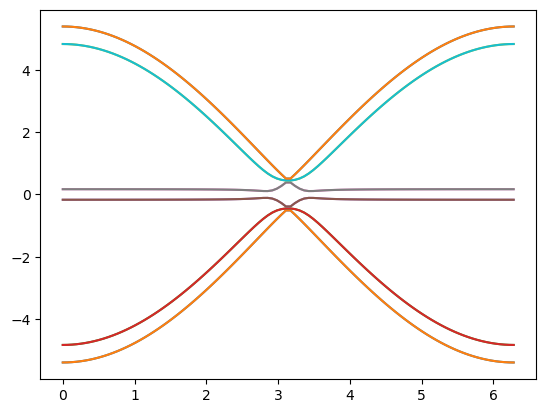

In [882]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
plt.plot(k, energies)

In [883]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [884]:
emax = np.amax(energies)
emax = emax+0.1*emax

In [885]:
G = myModel.simple_stats()
print(G['av'][6])

0.2294189666261163


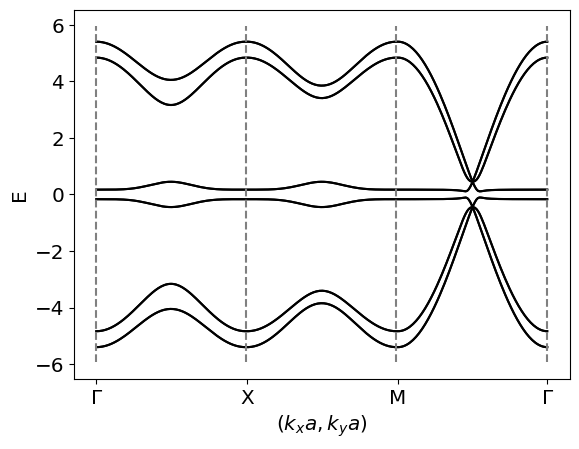

In [886]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)

plt.savefig("Pictures/ESCpath.png")
plt.show()

In [856]:
H(1, 0)[11]

array([ 0. +0.j,  0.4+0.j,  0.8+0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j, -1.6+0.j])

In [857]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\scModel.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  


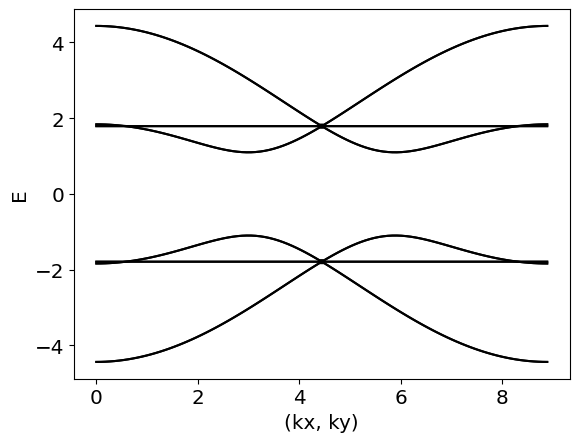

In [858]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [859]:
Ens = myModel.Es(k)

In [860]:
np.shape(Ens)

(12, 10100)

In [861]:
energies

array([[-4.43462176, -4.43321481, -4.42899558, ..., -4.42899558,
        -4.43321481, -4.43462176],
       [-4.43462176, -4.43321481, -4.42899558, ..., -4.42899558,
        -4.43321481, -4.43462176],
       [-1.83688048, -1.83571663, -1.83222875, ..., -1.83222875,
        -1.83571663, -1.83688048],
       ...,
       [ 1.83688048,  1.83571663,  1.83222875, ...,  1.83222875,
         1.83571663,  1.83688048],
       [ 4.43462176,  4.43321481,  4.42899558, ...,  4.42899558,
         4.43321481,  4.43462176],
       [ 4.43462176,  4.43321481,  4.42899558, ...,  4.42899558,
         4.43321481,  4.43462176]])

In [862]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

4.434621756054184

In [863]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [864]:
DOS1

array([5.17327926e-135, 1.41970861e-120, 6.05435940e-107, 4.01356190e-094,
       4.13784093e-082, 6.63789553e-071, 1.65800135e-060, 6.45349165e-051,
       3.91846968e-042, 3.71659180e-034, 5.51662912e-027, 1.28467712e-020,
       4.71039466e-015, 2.73381312e-010, 2.53246386e-006, 3.79713116e-003,
       9.45527700e-001, 4.12307487e+001, 3.56533130e+002, 8.34719872e+002,
       9.77118342e+002, 9.94919758e+002, 1.01356273e+003, 1.03739288e+003,
       1.06585001e+003, 1.09954672e+003, 1.14471989e+003, 1.21497861e+003,
       1.27962689e+003, 1.34254709e+003, 1.43747401e+003, 1.59083800e+003,
       1.89049405e+003, 2.20683311e+003, 1.92879427e+003, 1.50475005e+003,
       1.27274036e+003, 1.12444976e+003, 1.01293338e+003, 9.23128143e+002,
       8.47915997e+002, 7.83270340e+002, 7.26693485e+002, 6.76579724e+002,
       6.31997109e+002, 5.93098872e+002, 5.61286816e+002, 5.23088686e+002,
       4.72677822e+002, 4.35637662e+002, 4.05496576e+002, 3.77096560e+002,
       3.49954815e+002, 3

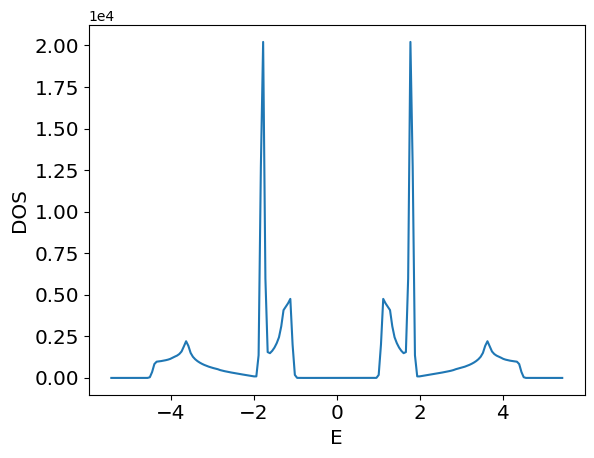

In [865]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()